In [1]:
import pandas as pd
data_path = '/kaggle/input/opsd-dataset/opsd_germany_daily.csv'

opsd_daily = pd.read_csv(data_path)
print(opsd_daily.shape)
print(opsd_daily.dtypes)
opsd_daily.head(3)

(4383, 5)
Date            object
Consumption    float64
Wind           float64
Solar          float64
Wind+Solar     float64
dtype: object


/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,Date,Consumption,Wind,Solar,Wind+Solar
0,2006-01-01,1069.184,NaN,NaN,NaN
1,2006-01-02,1380.521,NaN,NaN,NaN
2,2006-01-03,1442.533,NaN,NaN,NaN


In [2]:
opsd_daily = opsd_daily.set_index('Date')
opsd_daily.head(3)

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,Consumption,Wind,Solar,Wind+Solar
Date,,,,
2006-01-01,1069.184,NaN,NaN,NaN
2006-01-02,1380.521,NaN,NaN,NaN
2006-01-03,1442.533,NaN,NaN,NaN


In [3]:
opsd_daily = pd.read_csv(data_path, index_col=0, parse_dates=True)
opsd_daily["Year"]= opsd_daily.index.year
opsd_daily['Month']= opsd_daily.index.month
opsd_daily['Weekday Name'] = opsd_daily.index.day_name()

opsd_daily.sample(5,random_state=0)

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,Consumption,Wind,Solar,Wind+Solar,Year,Month,Weekday Name
Date,,,,,,,
2008-08-23,1152.011,NaN,NaN,NaN,2008,8,Saturday
2013-08-08,1291.984,79.666,93.371,173.037,2013,8,Thursday
2009-08-27,1281.057,NaN,NaN,NaN,2009,8,Thursday
2015-10-02,1391.050,81.229,160.641,241.870,2015,10,Friday
2009-06-02,1201.522,NaN,NaN,NaN,2009,6,Tuesday


In [4]:
opsd_daily.loc['2014-01-20':'2014-01-22']

,Consumption,Wind,Solar,Wind+Solar,Year,Month,Weekday Name
Date,,,,,,,
2014-01-20,1590.687,78.647,6.371,85.018,2014,1,Monday
2014-01-21,1624.806,15.643,5.835,21.478,2014,1,Tuesday
2014-01-22,1625.155,60.259,11.992,72.251,2014,1,Wednesday


<Axes: xlabel='Date'>

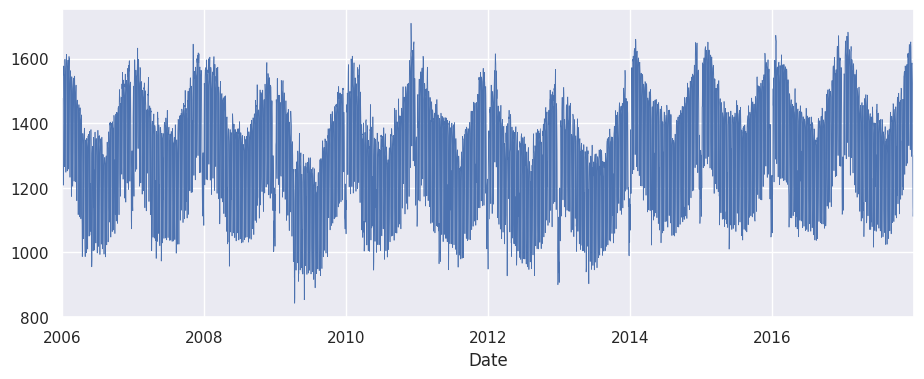

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(rc = {'figure.figsize':(11,4)})
opsd_daily['Consumption'].plot(linewidth=0.5)

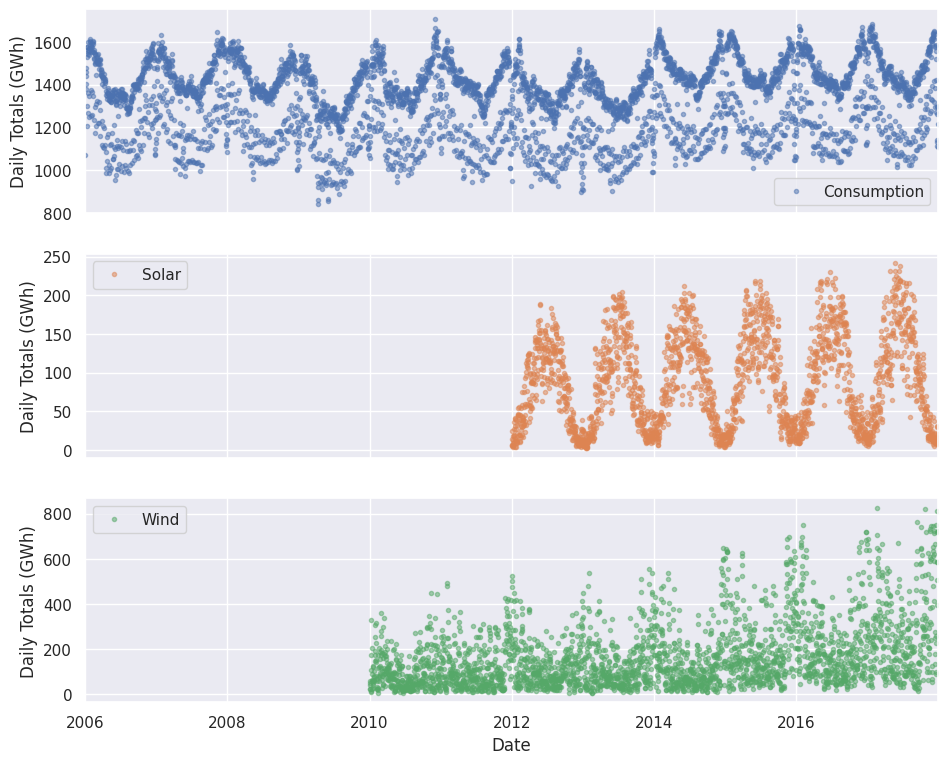

In [7]:
cols_plot = ['Consumption', 'Solar', 'Wind']
axes = opsd_daily[cols_plot].plot(marker ='.', alpha =0.5 , linestyle ='None',
figsize =(11 , 9) , subplots = True )
for ax in axes :
    ax. set_ylabel ('Daily Totals (GWh)')
plt.show ()

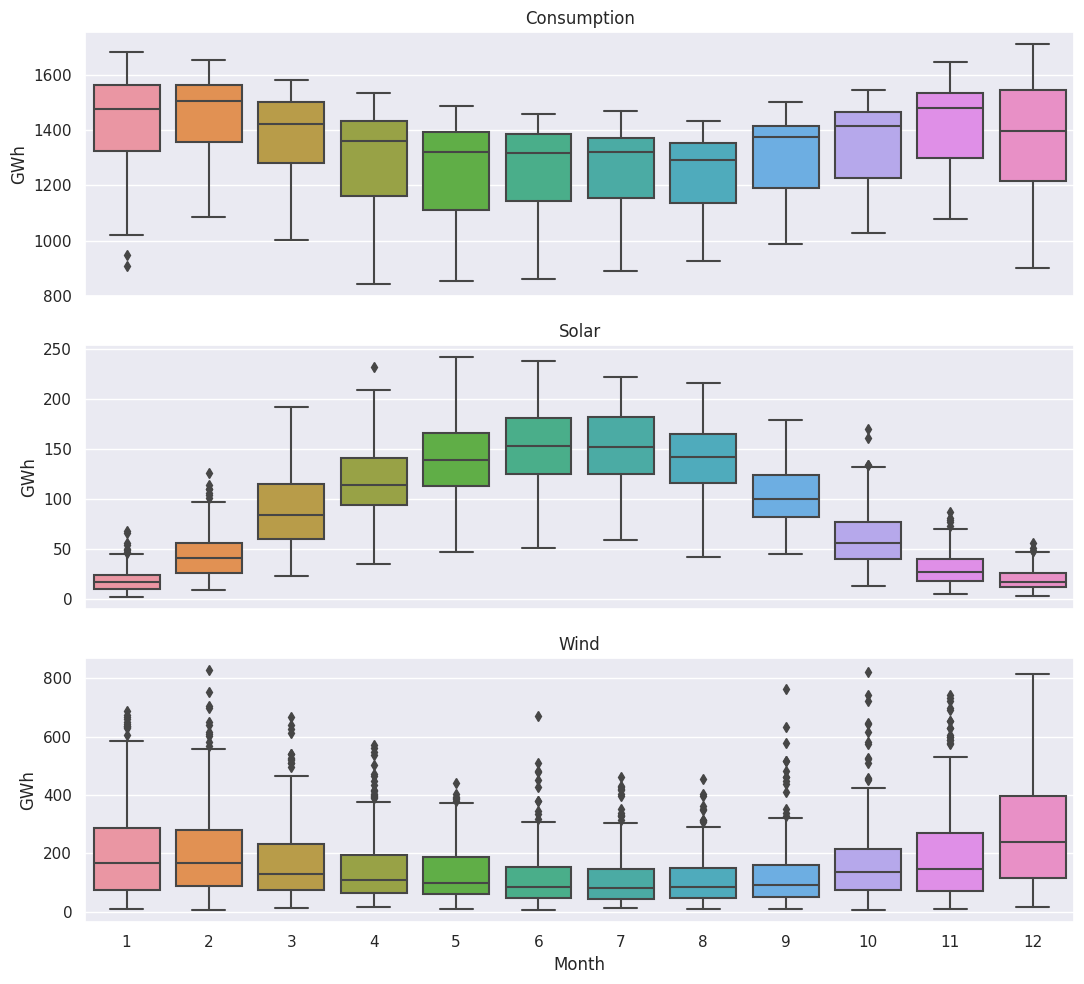

In [8]:

fig, axes = plt.subplots(3, 1, figsize=(11, 10), sharex=True)

for name, ax in zip(['Consumption', 'Solar', 'Wind'], axes):
    sns.boxplot(data=opsd_daily, x='Month', y=name, ax=ax)
    ax.set_ylabel('GWh')
    ax.set_title(name)

    # Bỏ nhãn x-axis ở tất cả subplot trừ subplot cuối cùng
    if ax != axes[-1]:
        ax.set_xlabel('')

plt.tight_layout()
plt.show()


In [9]:
pd.date_range('1998 -03 -10', '1998 -03 -15', freq ='D')

DatetimeIndex(['1998-03-10', '1998-03-11', '1998-03-12', '1998-03-13',
               '1998-03-14', '1998-03-15'],
              dtype='datetime64[ns]', freq='D')

In [14]:
times_sample = pd.to_datetime (['2013 -02 -03', '2013 -02 -06', '2013 -02 -08'])
consum_sample = opsd_daily.loc[times_sample, ['Consumption']].copy
consum_sample

<bound method NDFrame.copy of             Consumption
2013-02-03     1109.639
2013-02-06     1451.449
2013-02-08     1433.098>

In [21]:
# Giả sử opsd_daily là một DataFrame với chỉ mục là datetime
data_columns = ['Consumption', 'Wind', 'Solar', 'Wind+Solar']

# Resample lại dữ liệu theo tần suất hàng tuần ('W'), và tính trung bình cho mỗi tuần
opsd_weekly_mean = opsd_daily[data_columns].resample('W').mean()

# Hiển thị 3 dòng đầu tiên của dữ liệu
print(opsd_weekly_mean.head(3))



            Consumption  Wind  Solar  Wind+Solar
Date                                            
2006-01-01  1069.184000   NaN    NaN         NaN
2006-01-08  1381.300143   NaN    NaN         NaN
2006-01-15  1486.730286   NaN    NaN         NaN


/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


4383
627


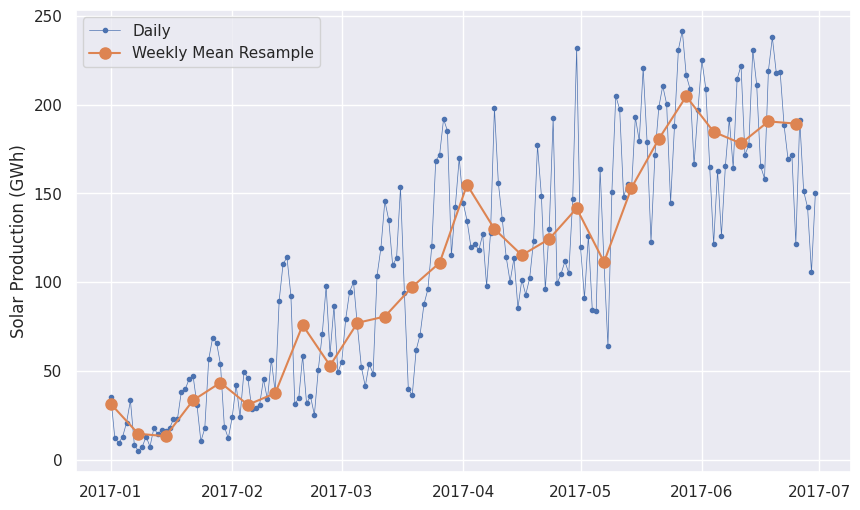

In [22]:
# In ra số lượng dòng của mỗi DataFrame
print(opsd_daily.shape[0])  # Số dòng trong opsd_daily
print(opsd_weekly_mean.shape[0])  # Số dòng trong opsd_weekly_mean

# Xác định khoảng thời gian cần vẽ biểu đồ
start, end = '2017-01', '2017-06'

# Vẽ biểu đồ time series theo ngày và theo tuần
fig, ax = plt.subplots(figsize=(10, 6))

# Vẽ đồ thị cho dữ liệu hàng ngày
ax.plot(opsd_daily.loc[start:end, 'Solar'], marker='.', linestyle='-', linewidth=0.5, label='Daily')

# Vẽ đồ thị cho dữ liệu đã được resample theo tuần
ax.plot(opsd_weekly_mean.loc[start:end, 'Solar'], marker='o', markersize=8, linestyle='-', label='Weekly Mean Resample')

# Gán nhãn cho trục y
ax.set_ylabel('Solar Production (GWh)')

# Thêm chú thích (legend)
ax.legend()

# Hiển thị đồ thị
plt.show()


/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


            Consumption  Wind  Solar  Wind+Solar
Date                                            
2006-01-01          NaN   NaN    NaN         NaN
2006-01-02          NaN   NaN    NaN         NaN
2006-01-03          NaN   NaN    NaN         NaN
2006-01-04  1361.471429   NaN    NaN         NaN
2006-01-05  1381.300143   NaN    NaN         NaN
2006-01-06  1402.557571   NaN    NaN         NaN
2006-01-07  1421.754429   NaN    NaN         NaN
2006-01-08  1438.891429   NaN    NaN         NaN
2006-01-09  1449.769857   NaN    NaN         NaN
2006-01-10  1469.994857   NaN    NaN         NaN


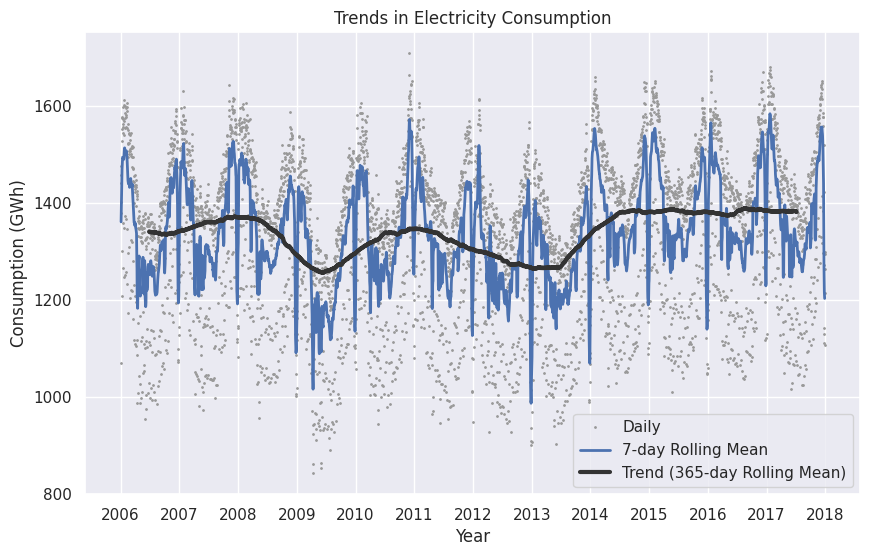

In [24]:
opsd_7d = opsd_daily[data_columns].rolling(window=7, center=True).mean()

# Hiển thị 10 dòng đầu tiên của kết quả
print(opsd_7d.head(10))
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Giả sử opsd_daily đã có sẵn với cột 'Consumption', 'Wind', 'Solar', 'Wind + Solar'
# Tạo rolling mean với cửa sổ 365 ngày và min_periods=360 để tránh thiếu dữ liệu
opsd_365d = opsd_daily[data_columns].rolling(window=365, center=True, min_periods=360).mean()

# Vẽ biểu đồ cho daily, 7-day rolling mean và 365-day rolling mean time series
fig, ax = plt.subplots(figsize=(10, 6))

# Vẽ dữ liệu tiêu thụ điện hàng ngày
ax.plot(opsd_daily['Consumption'], marker='.', markersize=2, color='0.6', linestyle='None', label='Daily')

# Vẽ rolling mean 7 ngày (giả sử opsd_7d là đã tính trước)
ax.plot(opsd_7d['Consumption'], linewidth=2, label='7-day Rolling Mean')

# Vẽ trend của rolling mean 365 ngày
ax.plot(opsd_365d['Consumption'], color='0.2', linewidth=3, label='Trend (365-day Rolling Mean)')

# Thiết lập ticks trục x theo năm và thêm legend, nhãn
ax.xaxis.set_major_locator(mdates.YearLocator())  # Tạo ticks theo từng năm
ax.legend()

# Gán nhãn cho trục và tiêu đề
ax.set_xlabel('Year')
ax.set_ylabel('Consumption (GWh)')
ax.set_title('Trends in Electricity Consumption')

# Hiển thị biểu đồ
plt.show()
